# Calidad de vino

In [143]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import RandomOverSampler
from imblearn.combine import SMOTETomek
from imblearn.ensemble import BalancedBaggingClassifier

# Identificación

*Tenemos una base de datos, donde su informacion pertenece a  las caracteristicas de un vinos.

In [2]:
file = '/home/data/Escritorio/Nataly/dato/Winequality.csv'
df = pd.read_csv(file, sep=';')
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [3]:
# Veremos las caracteristicas de los datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


Encontramos 11 variables de tipo decimal y una variable tipo entero, con un total de 12 variables y 1599 observaciones  

In [3]:
#Hacemos una descripcion de nuestras Variables para entender cual es su comportamiento, encontremos sus medias y su total de datos
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


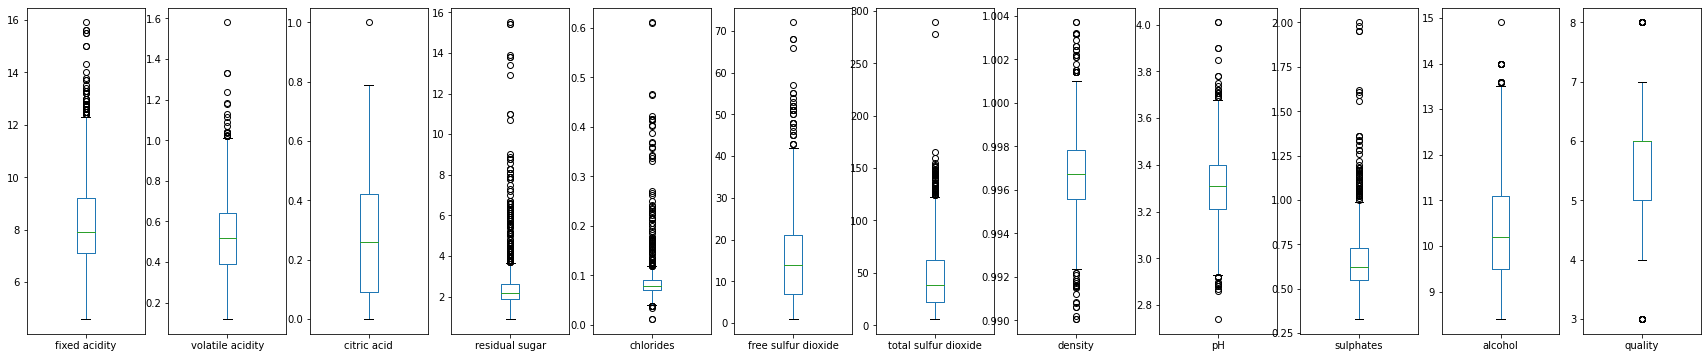

In [5]:
df.plot(kind='box', subplots=True, figsize=(30,6));

Vemos la distrubicuon de los datos, en donde se centra su media y cual seria su tercer cuantil, y la escala donde se distribuye cada variable y ver si existen datos atipico, tambien esto nos da una idea de si necesitamos en algun momento usar metodos de escalamiento a los datos, para hacerle la trasformacion de la escala.

podemos usar:

*MinMaxScaler

*StandardScaler

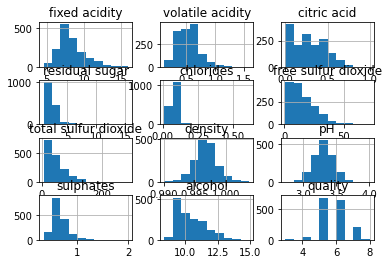

In [4]:
# Para las Variables Chlorides y residual sugar, no es muy clara su distribucion, usare un histograma para cada variable y tener una mejor ayuda visual de cada variable
df.hist()
plt.show()

Ya en esta parte podemos iniciar con una primera idea de nuestros datos.

1. Las siguientes variables son las que tienen un comportamiento similar de una campana de gauss:

    *density
    
    *ph

2. Las siguientes son las que tienen un comportamiento normal pero sesgado levemente hacia la derecha del cero:

    *Sulphates
    
    *total sulfur dioxide
    
    *residual sugar
    
    *chlorides
    
    *alcohol pero con media 10.422983
    
es una base de datos donde tenemos variables de tipo química para la calificación de los vinos, donde usaremos modelo de clasificación para encontrar grupos de calidad de vinos.

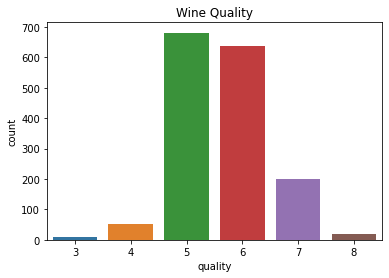

In [109]:
# Graficaremos la variable quality que es nuestra unica variable entera 
sns.countplot(x='quality',data=df)
plt.title('Wine Quality')
plt.show()

In [100]:
df['quality'].value_counts(normalize=False)

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

Aqui podemos ver que tenemos un clasificador multiclase y también denotamos que tenemos 6 tipo de categoría para la variable quality y desbalanceo

In [141]:
#Nuevo Rango de quality
def get_quality_range(val):
    if val < 5:
        label= 0
    elif val == 5:
        label = 1
    elif val == 6:
        label = 2
    else:
        label = 3
    return label
df['quality_range'] = df['quality'].apply(get_quality_range)

In [107]:
df['quality_range'].value_counts(dropna=False)

1    681
2    638
3    217
0     63
Name: quality_range, dtype: int64

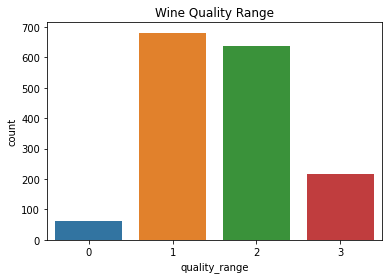

In [108]:
# Graficaremos la variable quality que es nuestra unica variable entera 
sns.countplot(x='quality_range',data=df)
plt.title('Wine Quality Range')
plt.show()

In [9]:
# Crear una lista con las siguientes variables
cols=['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']

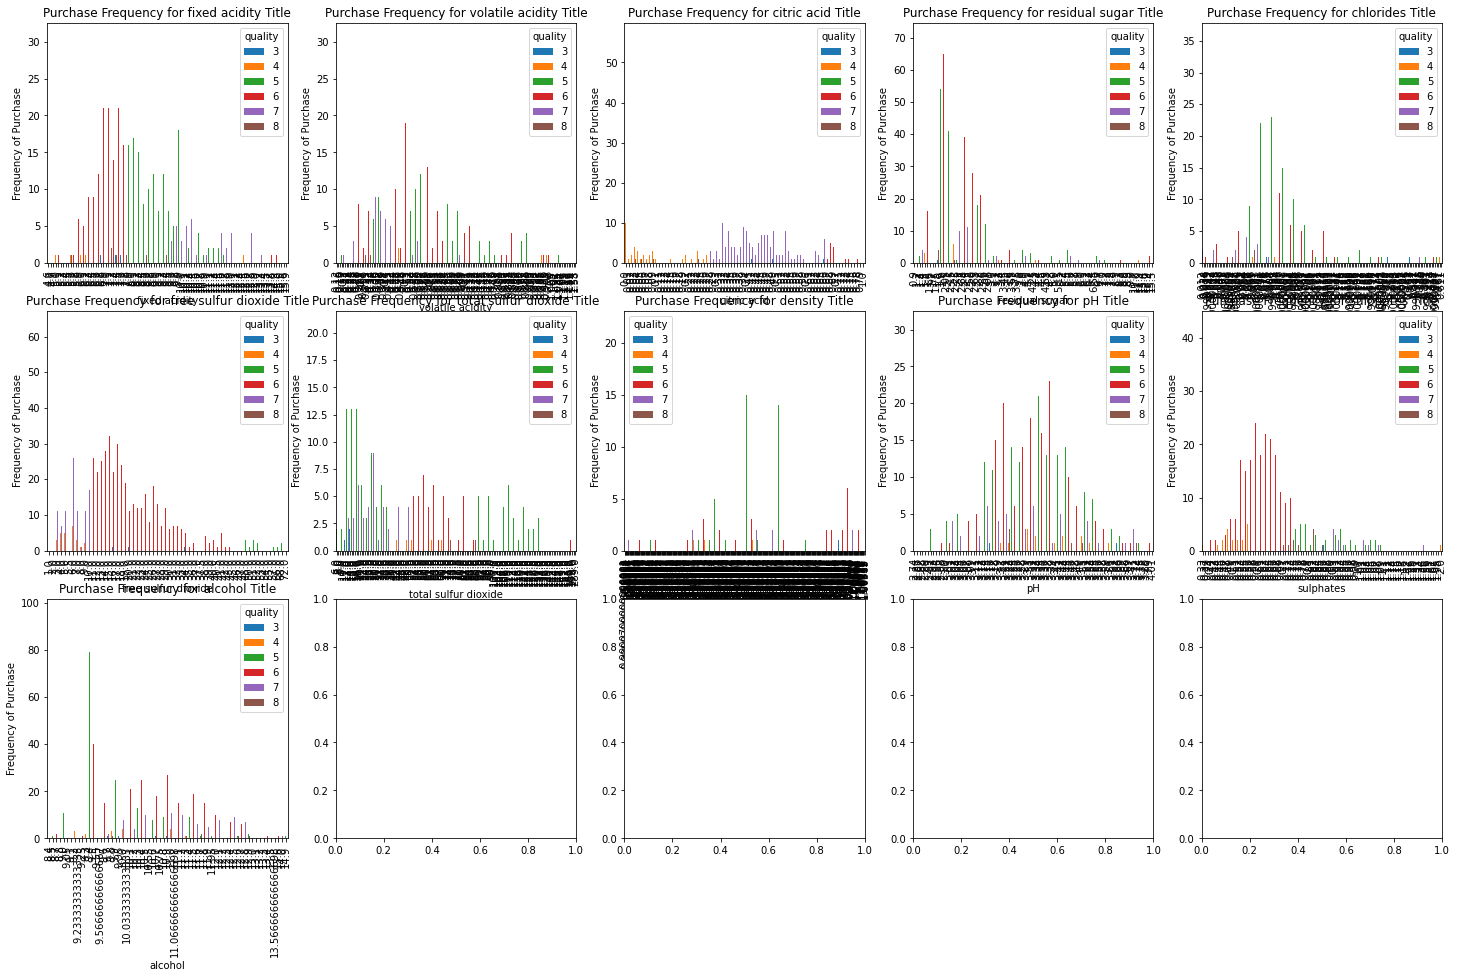

In [10]:
#Genera subplots en un plot para poder visualizar el comportamiento de cada variable simultaniamente
fig, ax = plt.subplots(ncols=5, nrows=3, figsize=(25, 15))
ax = ax.flatten()

#cols = [x for x in df.columns if x not in ['y']]
for i, col in enumerate(cols):
    pd.crosstab(df[col],df.quality).plot(kind='bar', ax=ax[i]) 
    ax[i].set_title('Purchase Frequency for {} Title'.format(col))
    ax[i].set_xlabel(col)
    ax[i].set_ylabel('Frequency of Purchase')
# plt.savefig('purchase_fre_job') 

Todas nuestras variables tienen aportes significativo para el análisis de clasificación de la calidad del vino, ya que todas las variables tienen comportamientos distintos y no similares 

# Data werehousing

Aquí nos centraremos en preparar la data al nivel de filtros, transformación, y limpieza

In [147]:
# Asignacion de valores
cols = [x for x in df.columns if x not in  ['quality', 'quality_range']]

X = df[cols].values
y = df['quality_range'].values

In [155]:
#Escalar los datos usando StandardScaler
# scaler= StandardScaler()
scaler = MinMaxScaler(feature_range=(-1,1) )
X_scale = scaler.fit_transform(X)

In [150]:
#El split para X_train/test
X_train, X_test, y_train, y_test = train_test_split(X_scale, y, test_size=0.3, random_state=42)

In [153]:
#Balanceo de datos
smt = SMOTE(random_state=0)
data_X, data_y =smt.fit_sample(X_train, y_train)

<BarContainer object of 4 artists>

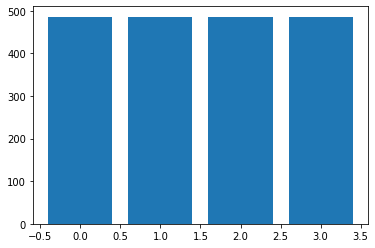

In [158]:
unique, counts = np.unique(data_y, return_counts=True)
plt.bar(unique, counts)

# Creación de modelo 

In [159]:
n_neighbors = 6
knn = KNeighborsClassifier(n_neighbors, p=X_train.shape[1], weights='distance', leaf_size=20)
knn.fit(data_X, data_y)
print('Accuracy of K-NN classifier on training set: {:.4f}'
     .format(knn.score(data_X, data_y)))
print('Accuracy of K-NN classifier on test set: {:.4f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 1.0000
Accuracy of K-NN classifier on test set: 0.5563


In [161]:
from sklearn.metrics import f1_score

In [168]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.13      0.39      0.19        18
           1       0.70      0.54      0.61       195
           2       0.60      0.52      0.56       200
           3       0.50      0.76      0.60        67

    accuracy                           0.56       480
   macro avg       0.48      0.55      0.49       480
weighted avg       0.61      0.56      0.57       480



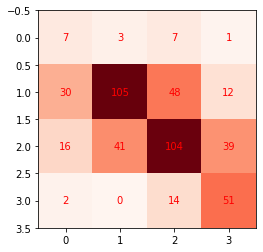

In [160]:
pred = knn.predict(X_test)

fig, ax = plt.subplots()

conf_matrix = confusion_matrix(y_test, pred)
im = ax.imshow(conf_matrix, cmap='Reds')
# plt.colorbar()

f1 = 

title = 'f1 score: {}'

# Loop over data dimensions and create text annotations.
for i in range(4):
    for j in range(4):
        text = ax.text(j, i, conf_matrix[i, j],
                       ha="center", va="center", color="r")

In [244]:
from sklearn.ensemble import RandomForestClassifier
# Random forest
# Fitting Random Forest Classification to the Training set
classifier = RandomForestClassifier(n_estimators = 200, criterion = 'gini', random_state = 23, max_depth=40)
classifier.fit(data_X, data_y)

RandomForestClassifier(max_depth=40, n_estimators=200, random_state=23)

In [245]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.10      0.17      0.12        18
           1       0.75      0.69      0.72       195
           2       0.68      0.66      0.67       200
           3       0.58      0.67      0.62        67

    accuracy                           0.65       480
   macro avg       0.53      0.55      0.53       480
weighted avg       0.67      0.65      0.66       480



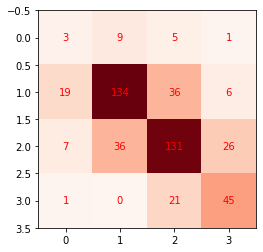

In [246]:
fig, ax = plt.subplots()

conf_matrix = confusion_matrix(y_test, y_pred)
im = ax.imshow(conf_matrix, cmap='Reds')
# plt.colorbar()

# Loop over data dimensions and create text annotations.
for i in range(4):
    for j in range(4):
        text = ax.text(j, i, conf_matrix[i, j],
                       ha="center", va="center", color="r")

# print(classification_report(y_test, pred))

In [241]:
from sklearn.svm import SVC
clf = SVC(kernel='rbf', coef0=1, gamma=10)
clf.fit(data_X, data_y)

SVC(coef0=1, gamma=10)

In [242]:
y_pred_svm = clf.predict(X_test)
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.19      0.28      0.23        18
           1       0.69      0.69      0.69       195
           2       0.61      0.59      0.60       200
           3       0.62      0.60      0.61        67

    accuracy                           0.62       480
   macro avg       0.53      0.54      0.53       480
weighted avg       0.63      0.62      0.62       480



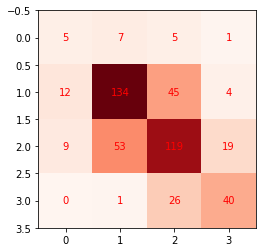

In [243]:
fig, ax = plt.subplots()

conf_matrix = confusion_matrix(y_test, y_pred_svm)
im = ax.imshow(conf_matrix, cmap='Reds')
# plt.colorbar()

# Loop over data dimensions and create text annotations.
for i in range(4):
    for j in range(4):
        text = ax.text(j, i, conf_matrix[i, j],
                       ha="center", va="center", color="r")

Usamos dos técnicas para intentar balancear la data:


    1.Generamos un nuevo ranking donde 0 es el vino mas malo y 3 es el mejor.
    
    2.Aplicamos una técnica de desbalanceo, donde generamos datos sintéticos para reducir el error de predicción al momento de darse alguna asignación.
    
Usamos tres modelos, los cuales haciendo ajustes de sus parámetros podemos llegar a un mejor ajuste, al nivel de evaluación el modelo mínimo viable para mi análisis es el Randon Forest y SVM,  al momento que vemos las matrices de confusión nos damos cuenta que los modelos tienen muy poca precisión para el vino de categoria 0 que es de mala calidad.   

Algo que intente pero llegue a la conclusión de que necesitaba el balanceo, esta reducción fue la que me afirmó el de tratar de balancear la data.  

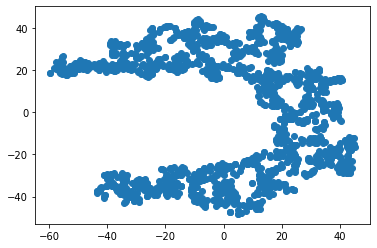

In [74]:
from sklearn.manifold import TSNE

tsne = TSNE()
tsne.fit(X) 
x_tsne = tsne.fit_transform(X)

plt.scatter(x_tsne[:, 0], x_tsne[:, 1])

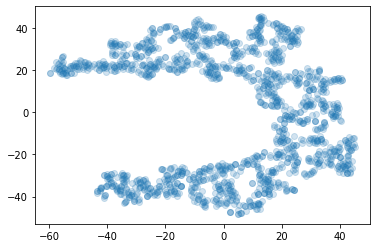

In [75]:
plt.scatter(x_tsne[:, 0], x_tsne[:, 1], alpha=0.2)

In [57]:
#Vamos a reducir la dimencion de X_train
#pca = PCA(n_components=3, svd_solver='full')
pca = PCA(0.95)
pca.fit(X)
print(pca.explained_variance_ratio_)

[0.94657698 0.0483683 ]


lo dejaremos a 2 componentes ya que la suma de ellas nos da un total de 98 de varianza 

In [58]:
x_pca = pca.transform(X)
x_pca

array([[-13.22490501,  -2.02389981],
       [ 22.03772361,   4.40832155],
       [  7.16267333,  -2.50146086],
       ...,
       [ -3.43135351,  14.27124349],
       [  1.13287834,  16.31616732],
       [ -3.8743766 ,   3.12634754]])

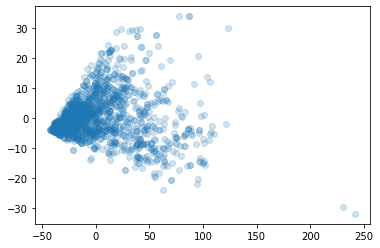

In [59]:
x_values = x_pca[:, 0]
y_values = x_pca[:, 1]
# z_values = x_pca[:, 2]

#plt.scatter(x_values, y_values, z_values, alpha=0.2)
plt.scatter(x_values, y_values, alpha=0.2)

In [60]:
#Escalar los datos usando StandardScaler
scaler= StandardScaler()
#scaler = MinMaxScaler()
scaler.fit(x_pca)
x_pca_scaled = scaler.transform(x_pca)

In [68]:
x_pca_train, x_pca_test, y_train, y_test = train_test_split(x_pca_scaled, y, test_size=0.3, random_state=42)

In [70]:
knn_pca = KNeighborsClassifier(n_neighbors, metric='euclidean')
knn_pca.fit(x_pca_train, y_train)

print('Accuracy of K-NN classifier on training set: {:.4f}'
     .format(knn_pca.score(x_pca_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.4f}'
     .format(knn_pca.score(x_pca_test, y_test)))

Accuracy of K-NN classifier on training set: 0.5442
Accuracy of K-NN classifier on test set: 0.4604


In [54]:
np.unique(y_train)

array([3, 4, 5, 6, 7, 8])